## 1. Importando bibliotecas

# Análise Exploratória de Dados

In [1]:
import pandas as pd
import numpy as np
import math

# Visualização
# !pip install bokeh
# from bokeh.plotting import figure, show, output_file
# from bokeh.io import output_notebook
# from bokeh.models import Legend, LegendItem, LassoSelectTool, HoverTool

# output_notebook()

# !pip install seaborn plotly
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


## 2. Carregando os dados

In [2]:
caminho = 'https://media.githubusercontent.com/media/Ciencia-de-Dados-IMT-2023/Datasets/main/Spotify-EDA/df_musics.csv'

df = pd.read_csv(caminho)
display(df.sample(5))

,id,id_album,id_artist,name,explicit,duration_ms,popularity,acousticness,danceability,energy,...,album_name,album_popularity,album_release_date,album_total_tracks,album_type,artist_name,artist_genres,artist_popularity,artist_type,artist_followers
9803,4YwNf1fLZt9IQhJeHNWfBi,7viNUmZZ8ztn2UB4XB3jIL,6l3HvQ5sa6mXTsMTB19rO5,Intro,True,129266,2,0.84400,0.435,0.268,...,2014 Forest Hills Drive,10,2014-12-09,13,album,J. Cole,rap,87,artist,20205181
2914,3dhvJ9A5uBPJ0NMV9GWTWY,0C20C6iMHfGBHItchVvJgi,59NO6KX7wQCG7jGdtH1NtL,I Don't Care,False,255106,14,0.05280,0.710,0.802,...,Playlist: The Very Best Of Raheem DeVaughn,22,2004,14,album,Raheem DeVaughn,r&b,47,artist,504123
4428,42GcjriRK6srwHkfbkBqVl,7D2NdGvBHIavgLhmcwhluK,5K4W6rqBFWDnAN6FQUkS6x,Blood On The Leaves,True,359800,66,0.39500,0.397,0.690,...,Yeezus,82,2013-06-18,10,album,Kanye West,rap,90,artist,20146467
16758,1KV1aCL5ysI6MWDThh002y,3YBy3V1k30XqY9WrZpbhFh,296LotOmbj7eOX7r9l46fK,Every Little Thing I Do,False,260066,0,0.00561,0.713,0.378,...,Candy Rain,0,1994-01-01,11,album,Soul For Real,r&b,54,artist,634058
6704,5ecZWU5uQOiCVSnPxBZNmT,0Yu3czJNOQ68fZgkvpjuHL,5YGY8feqx7naU7z4HrwZM6,7 Things - Single Version,False,213453,66,0.02320,0.590,0.903,...,Breakout,63,2008-01-01,12,album,Miley Cyrus,pop,88,artist,20834142


## 3. Tratar os Dados (Análise Quantitativa)

1. Excluir informações não relevantes
2. Tratar tipos da colunas
3. Tratar colunas com todos os valores vazios

### 3.1 Excluir informações não relevantes

In [3]:
print(df.columns)

Index(['id', 'id_album', 'id_artist', 'name', 'explicit', 'duration_ms',
       'popularity', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'album_name',
       'album_popularity', 'album_release_date', 'album_total_tracks',
       'album_type', 'artist_name', 'artist_genres', 'artist_popularity',
       'artist_type', 'artist_followers'],
      dtype='object')


In [4]:
# Mantém uma base com os IDs e o nome das músicas
colunas_ids = ['id', 'id_album', 'id_artist', 'name']

df_ids = df.loc[:, colunas_ids]
display(df_ids.sample(5))

,id,id_album,id_artist,name
20032,5YTM7OgQDt9EJAYcfHLniJ,4v5x3Oo3UjQ9YmF3hRAip5,09hVIj6vWgoCDtT03h8ZCa,Award Tour
20500,1BPoc4djycD8lq8j6nqCd8,5GeQP7sSDEchG7OK4r2aeb,7bXgB6jMjp9ATFy66eO08Z,Champion (feat. Chris Brown)
3420,0B8QzDH7YWih85V5SEMnyJ,7mgdTKTCdfnLoa1HXHvLYM,4O15NlyKLIASxsJ0PrXPfz,Money Longer
2266,01KdLUbWrTXdviMq7bDhip,3QZ9gSv35M8vfQA127l3vn,2HPaUgqeutzr3jx5a9WyDV,Deserve It
20909,3C4FUqrrjuvWoHwsumWfIu,187UNqZ7MX3neMYkkevmdm,50co4Is1HCEo8bhOyUWKpn,Cruise Ship


In [5]:
# Remove as colunas de IDs

df_musicas = df.drop(columns=colunas_ids)
display(df_musicas.sample(5))

,explicit,duration_ms,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,...,album_name,album_popularity,album_release_date,album_total_tracks,album_type,artist_name,artist_genres,artist_popularity,artist_type,artist_followers
14602,False,249093,17,0.10800,0.666,0.856,0.000000,9,0.1040,-4.329,...,Perfectly Imperfect,48,2012-08-03,11,album,Elle Varner,r&b,42,artist,326638
7352,False,236213,0,0.02760,0.855,0.747,0.000034,7,0.1820,-2.713,...,Love Angel Music Baby,0,2004-10-27,12,album,Eve,r&b,68,artist,1237651
26101,True,200093,25,0.00777,0.525,0.875,0.000000,2,0.0869,-4.146,...,Top 5 Dead Or Alive,43,2015-12-11,18,album,Wiz Khalifa,hip hop,82,artist,11049393
13199,True,214173,0,0.10300,0.621,0.676,0.000000,1,0.0458,-5.546,...,Can't Trust Thots,0,2014-09-30,1,album,French Montana,hip hop,74,artist,5027514
4751,True,51560,32,0.49600,0.540,0.358,0.000000,8,0.8430,-11.203,...,Southernplayalisticadillacmuzik,60,1994-04-26,17,album,Outkast,hip hop,75,artist,2245486


### 3.2 Tratar tipos das colunas

In [6]:
dtypes = df_musicas.dtypes
linha_ex = df_musicas.iloc[1000]

tipos_colunas_df = pd.concat([dtypes, linha_ex], axis=1)
tipos_colunas_df.columns = ['dtype', 'exemplo']
display(tipos_colunas_df)

,dtype,exemplo
explicit,bool,False
duration_ms,int64,227821
popularity,int64,0
acousticness,float64,0.111
danceability,float64,0.797
energy,float64,0.792
instrumentalness,float64,0.000079
key,int64,6
liveness,float64,0.24
loudness,float64,-5.758


**Tratando coluna de album_release_date** 

Configurando tipo da coluna para datetime

In [7]:
df_musicas['album_release_date'] = pd.to_datetime(df_musicas['album_release_date'], format='%Y-%m-%d')
display(df_musicas['album_release_date'].sample(5))

27566   2015-04-28
19454   2005-01-01
13474   2003-12-02
19667   2011-11-15
9898    2015-01-06
Name: album_release_date, dtype: datetime64[ns]

**Tratando coluna de mode** 

Configurando tipo da coluna para boolean

In [8]:
df_musicas['mode'].unique()

array([0, 1], dtype=int64)

In [9]:
df_musicas['mode'] = df_musicas['mode'].astype('bool')
display(df_musicas['mode'].sample(5))

2704     False
10138     True
7632      True
18225     True
5759     False
Name: mode, dtype: bool

### 3.3 Tratar colunas com todos os valores vazios

In [10]:
print(df_musicas.isnull().sum())

explicit              0
duration_ms           0
popularity            0
acousticness          0
danceability          0
energy                0
instrumentalness      0
key                   0
liveness              0
loudness              0
mode                  0
speechiness           0
tempo                 0
time_signature        0
valence               0
album_name            0
album_popularity      0
album_release_date    0
album_total_tracks    0
album_type            0
artist_name           0
artist_genres         0
artist_popularity     0
artist_type           0
artist_followers      0
dtype: int64


##

## 4. Análise Exploratória e Tratamento de Outliers

1. Correlação entre as variáveis
2. Distribuição das variáveis
3. Tratamento de Outliers

### 4.1 Correlação entre as variáveis

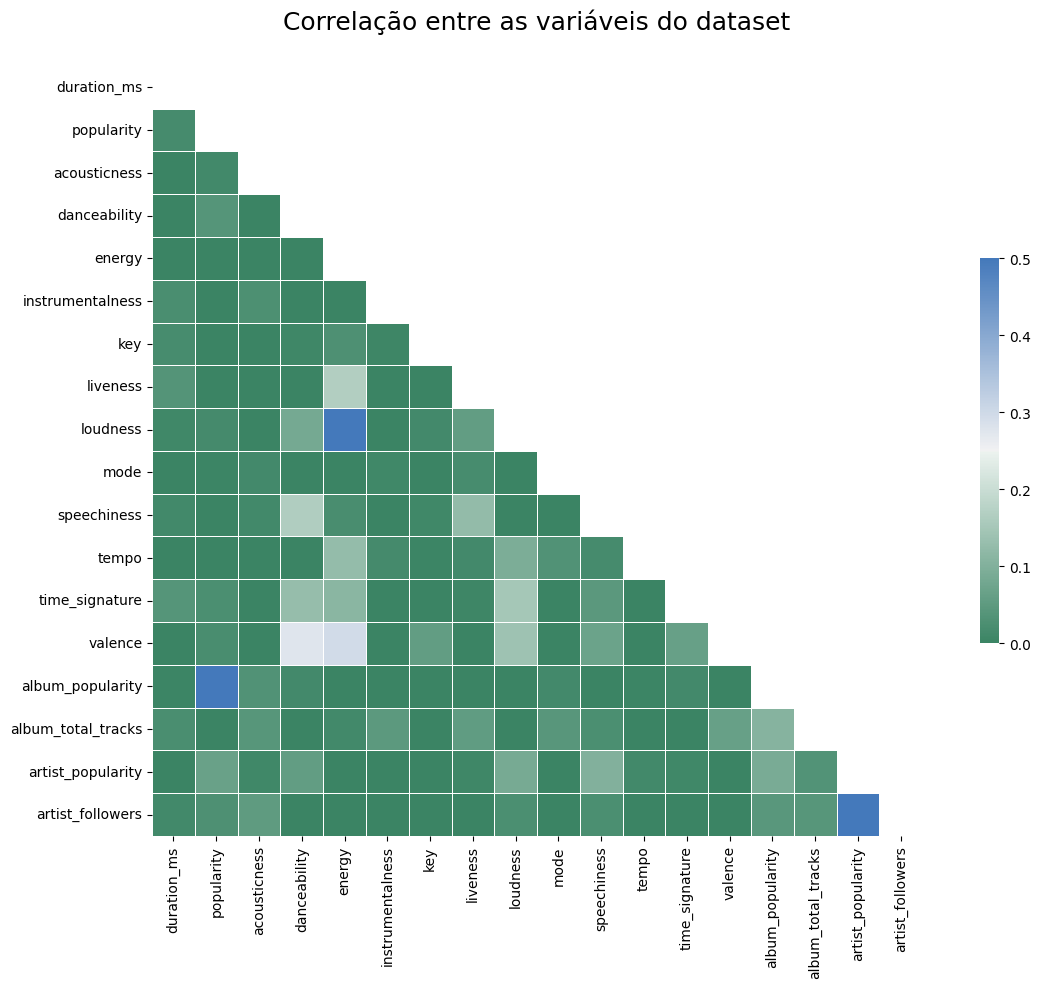

In [11]:
plt.figure(figsize=(15, 10))

colunas_nao_usadas = ['explicit']

mask = np.triu(np.ones_like(df_musicas.drop(columns=colunas_nao_usadas).corr(), dtype=bool))
cmap = sns.diverging_palette(150, 250, as_cmap=True)

sns.heatmap(
    df_musicas.drop(columns=colunas_nao_usadas).corr(), 
    mask=mask,
    square=True,
    vmin=0, 
    vmax=.5, 
    cmap=cmap,
    linewidths=.5,
    # annot=True,

    # fmt='.2f',
    cbar_kws={"shrink": .5}
    )

plt.title('Correlação entre as variáveis do dataset\n', fontsize=18)
plt.show()

Com base nesse mapa de calor, nota-se que, naturalmente, a coluna de "album_popularity" (popularidade do album daquela música) está altamente correlacionada (92%) com "popularity" (popularidade da música). Da mesma forma que "artist_followers" (seguidores do artista) possui uma correlação de 65% com "artist_popularity" (popularidade do artista), o que também é esperado.

Além disso, é interessante notar que as seguintes _feature_ apresentaram certo grau de correlação

- loudness x energy (68%)
- valence x danceability (28%)
- valence x energy (30%)
- valence x loudness (14%)

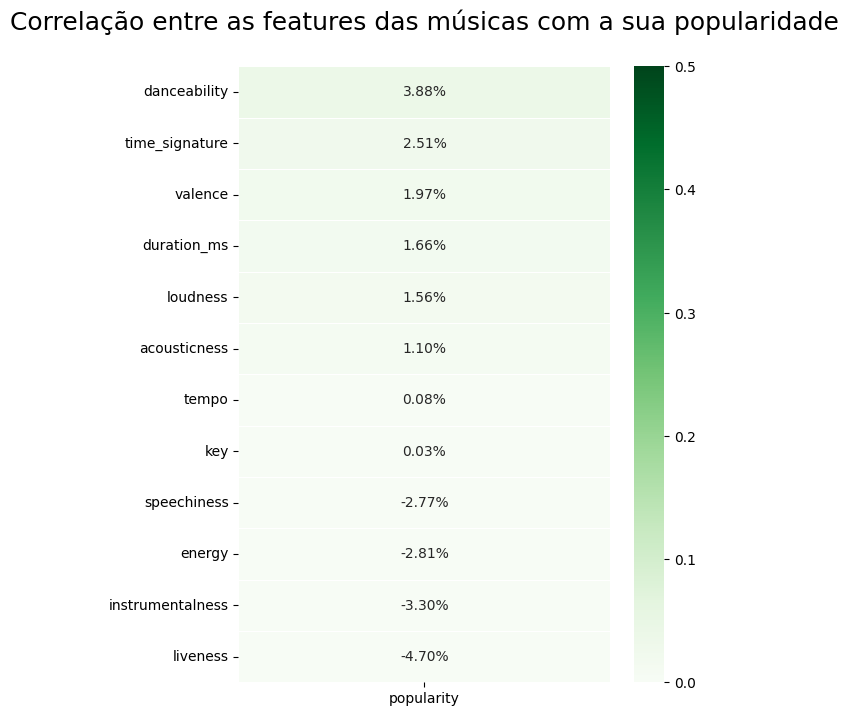

In [12]:
plt.figure(figsize=(6, 8))

colunas_nao_usadas = ['explicit', 'album_popularity', 'artist_popularity', 'artist_followers', 'album_total_tracks', 'mode']

sns.heatmap(
    df_musicas.drop(columns=colunas_nao_usadas).corr()[['popularity']].sort_values(by=['popularity'], ascending=False)[1:],

    annot=True, 
    vmin=0, 
    vmax=.5, 
    cmap='Greens',
    linewidths=.5,
    fmt='.2%'
    )


plt.title('Correlação entre as features das músicas com a sua popularidade\n', fontsize=18)
plt.show()

Análisando o gráfico acima, onde procurou encontrar alguma correlação entre as características da música e sua popularidade, nota-se que não há nenhuma regra geral para produzir uma música popular - todas as features apresentaram correlações próximas a zero.

In [13]:
generos_artistas = df_musicas['artist_genres'].unique()
print('Gêneros de artistas:', len(generos_artistas)	)

print(generos_artistas)

Gêneros de artistas: 7
['hip hop' 'r&b' 'rap' 'pop' 'rock' 'punk' 'reggae']


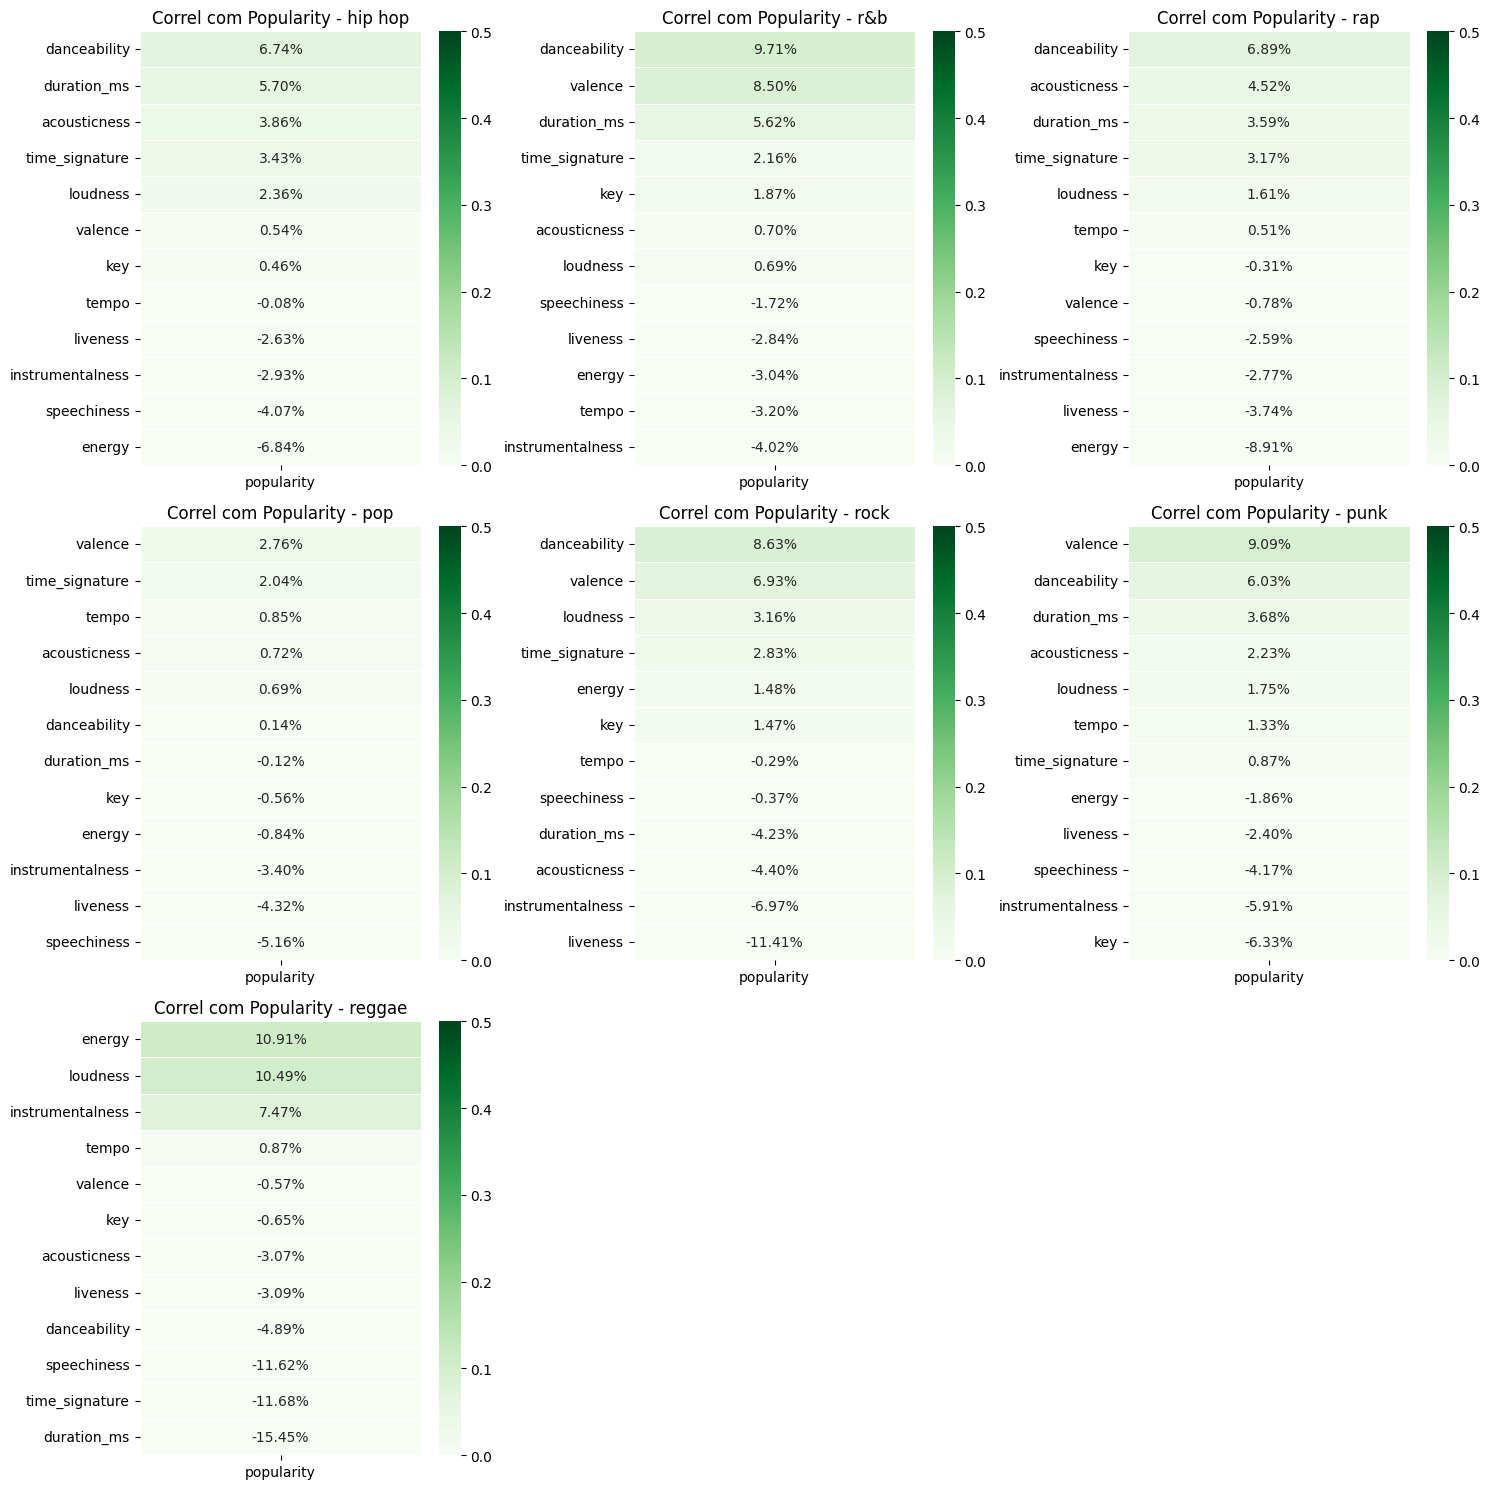

In [14]:
# Cálculo do tamanho da grid
num_plots = len(generos_artistas)
cols = math.ceil(math.sqrt(num_plots))
rows = math.ceil(num_plots / cols)

# Criação da grid de subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 15))

for i, genero in enumerate(generos_artistas):
    df_genero = df_musicas[df_musicas['artist_genres'] == genero]
    correl = df_genero.drop(columns=colunas_nao_usadas).corr()[['popularity']].sort_values(by=['popularity'], ascending=False).drop('popularity')

    # Determinar o índice da subplot atual
    row_idx = i // cols
    col_idx = i % cols

    sns.heatmap(
        correl, 

        annot=True, 
        vmin=0, 
        vmax=.5, 
        cmap='Greens',
        linewidths=.5,
        fmt='.2%',
        ax=axes[row_idx, col_idx]
        
        )
    
    axes[row_idx, col_idx].set_title(f'Correl com Popularity - {genero}')

# Remover subplots vazios
if num_plots < rows * cols:
    for j in range(num_plots, rows * cols):
        fig.delaxes(axes.flatten()[j])

# Ajuste do espaçamento entre as subplots
plt.tight_layout()

# Exibição do gráfico
plt.show()

#TODO: Texto falando das conclusões do gráfico

### 4.2 Distribuição das variáveis

In [15]:
df_musicas.columns

Index(['explicit', 'duration_ms', 'popularity', 'acousticness', 'danceability',
       'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'album_name',
       'album_popularity', 'album_release_date', 'album_total_tracks',
       'album_type', 'artist_name', 'artist_genres', 'artist_popularity',
       'artist_type', 'artist_followers'],
      dtype='object')

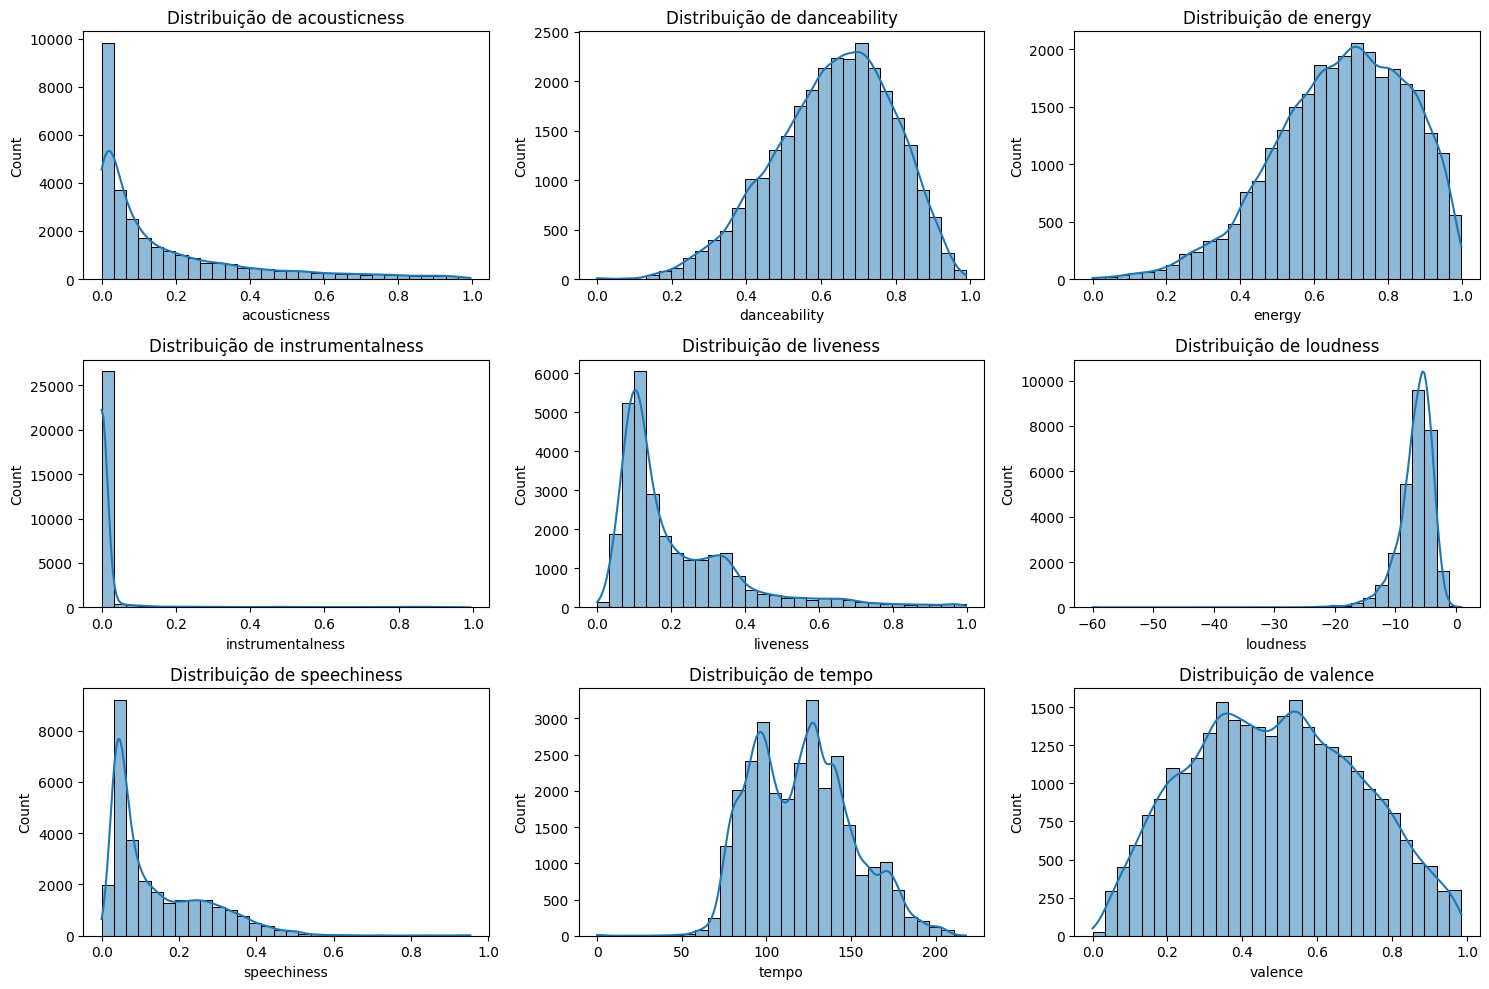

In [16]:
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

# Criação da grid de subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for i, feature in enumerate(features):

    # Determinar o índice da subplot atual
    row_idx = i // 3
    col_idx = i % 3

    sns.histplot(
        df_musicas[feature], 
        kde=True,
        ax=axes[row_idx, col_idx],
        bins=30
        )
    
    axes[row_idx, col_idx].set_title(f'Distribuição de {feature}')


# Ajuste do espaçamento entre as subplots
plt.tight_layout()

# Exibição do gráfico
plt.show()

Vamos ver como as distribuições variam conforme os diferentes gêneros musicais.

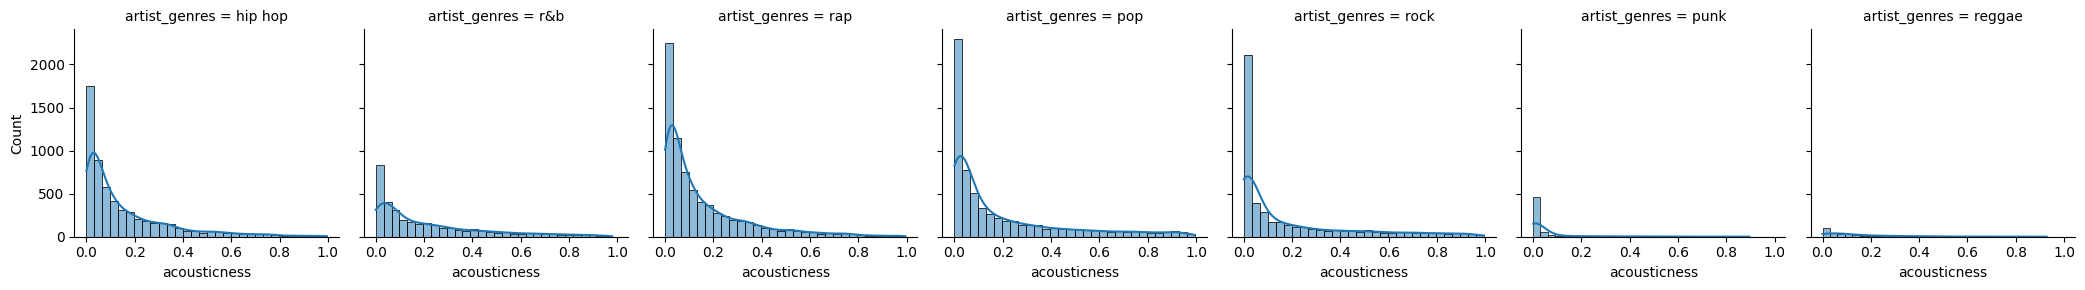

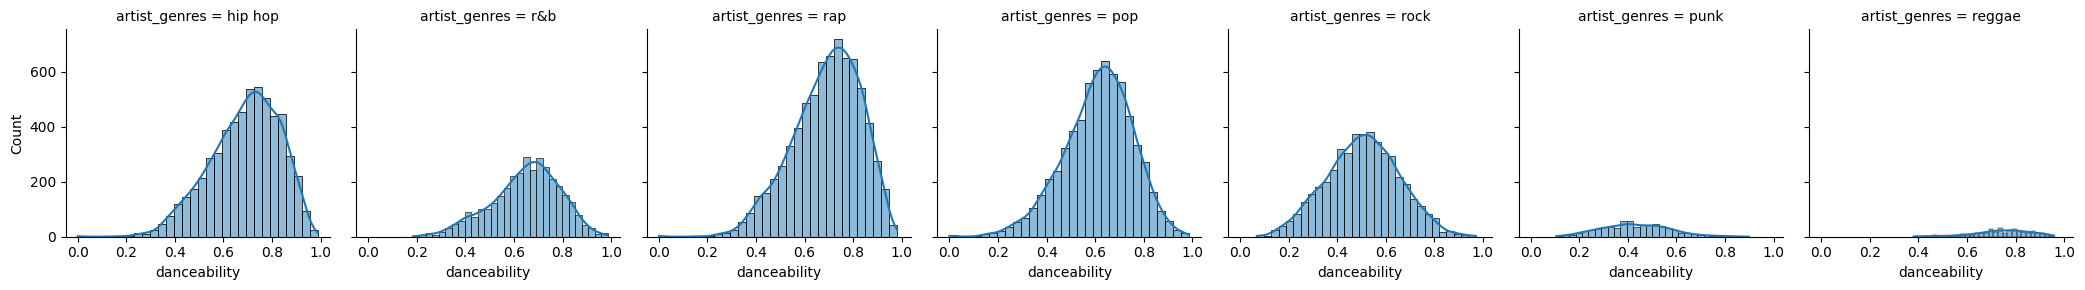

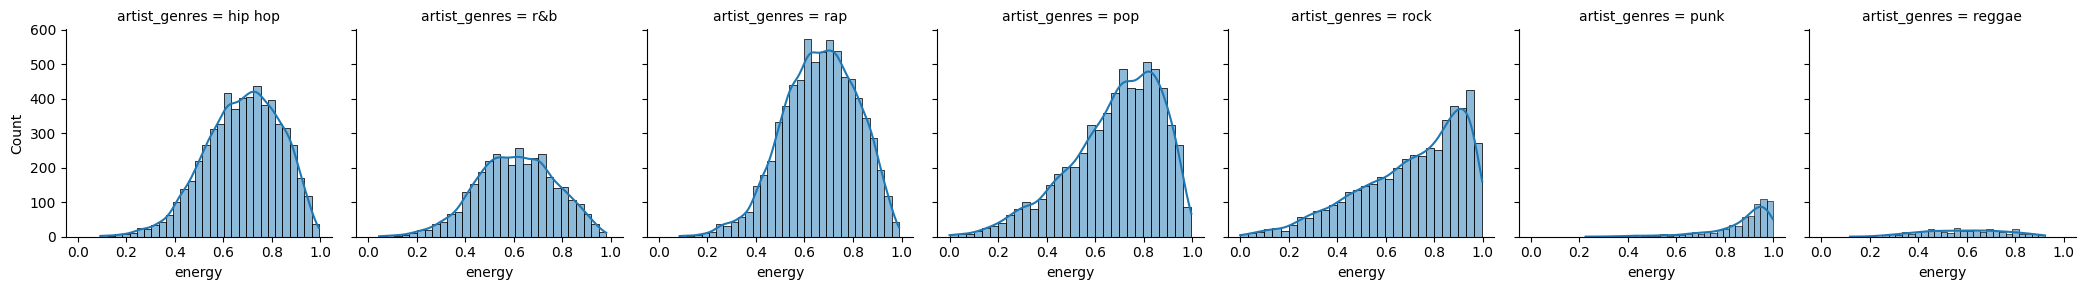

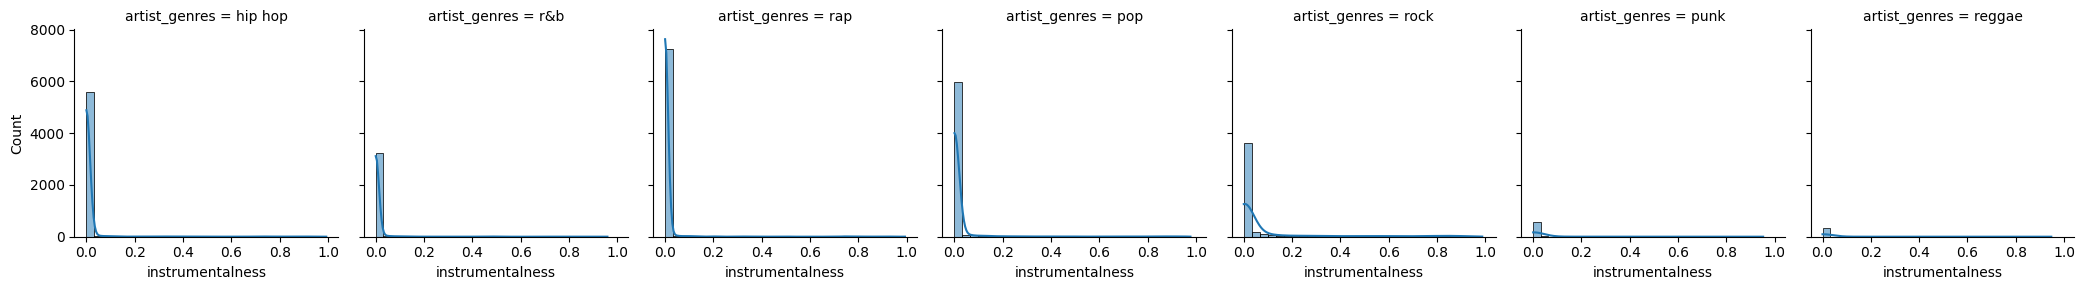

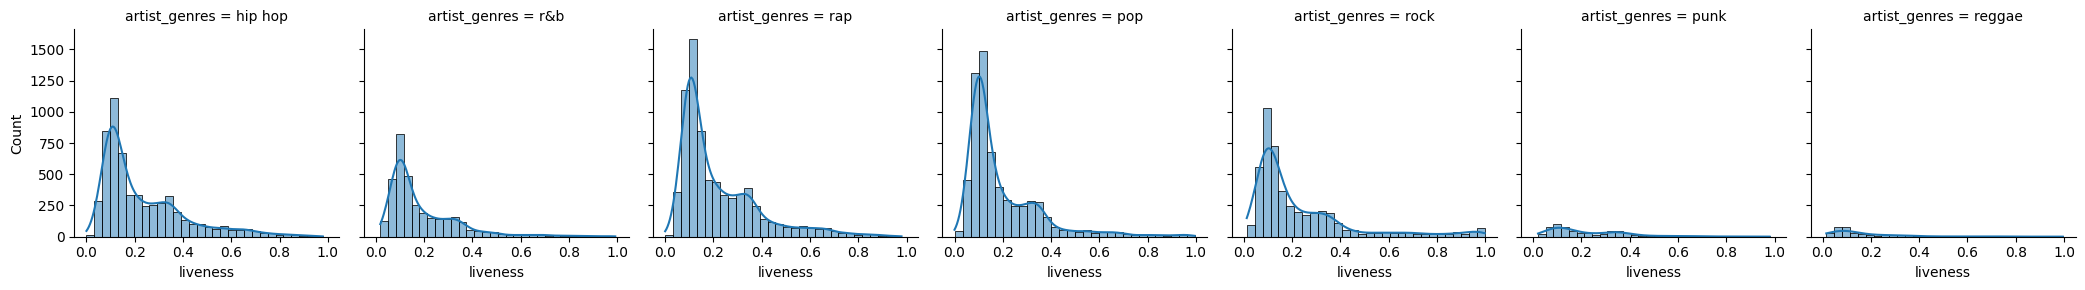

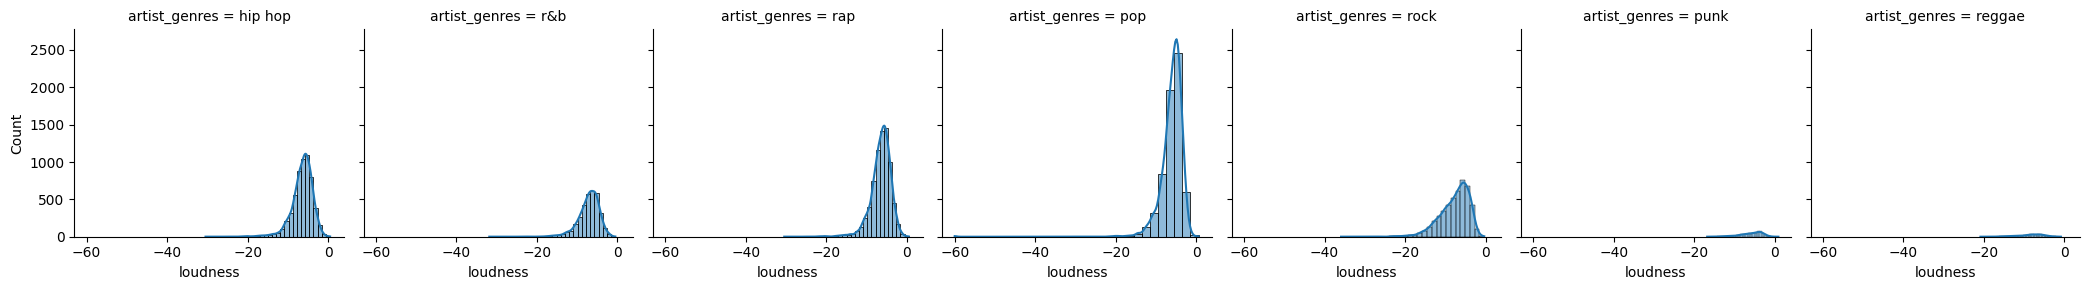

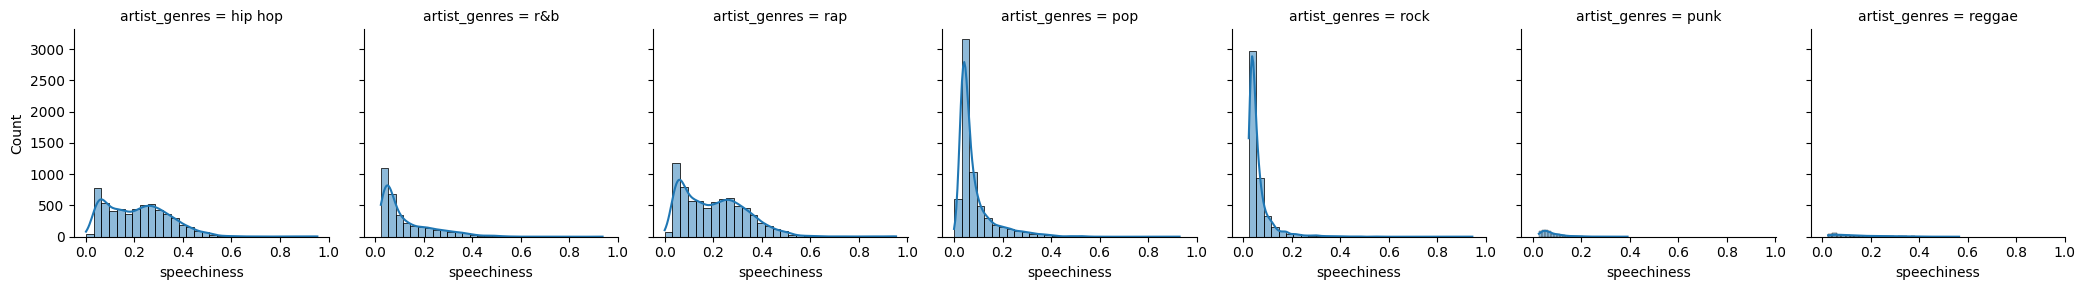

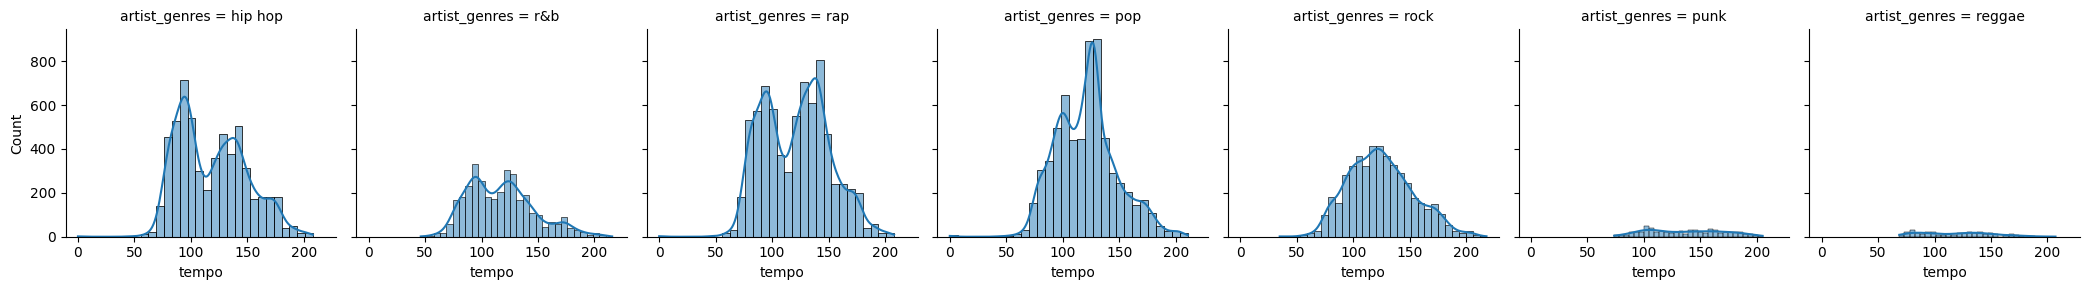

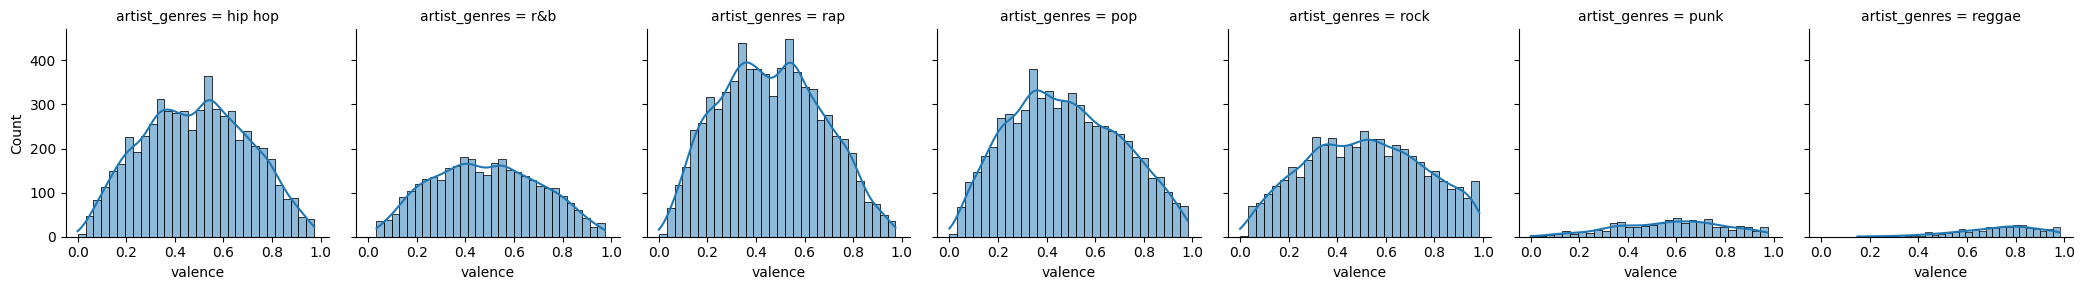

In [17]:
for feature in features:
    plt.rcParams['figure.figsize'] = (20,7)
    g = sns.FacetGrid(df_musicas, col='artist_genres')
    g.map(sns.histplot, feature, kde=True, bins=30)
    plt.show()

Como era de se esperar, cada gênero músical possui uma distribuição diferente para cada _feature_. Com destaque para Punk e Reggae, que possuem distribuições bem diferentes das demais em quase todas as _features_.

### 4.3 Tratamento de Outliers

Para cada feature, foi calculado o intervalo interquartil (IQR) e, em seguida, os valores que estavam fora desse intervalo foram considerados outliers e removidos.

In [18]:
def remover_outliers_por_genero(df, coluna):
    # Conta quantas linhas tinha antes
    num_linhas_antes = df.shape[0]

    # Cálculo dos limites do intervalo interquartil (IQR) por gênero
    q1 = df.groupby('artist_genres')[coluna].quantile(0.25)
    q3 = df.groupby('artist_genres')[coluna].quantile(0.75)
    iqr = q3 - q1

    # Cálculo dos limites inferior e superior para determinar os outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Função para filtrar os outliers por gênero
    def filter_outliers_by_genre(group):
        genre = group.name
        return group[(group[coluna] >= lower_bound[genre]) & (group[coluna] <= upper_bound[genre])]

    # Aplicar a função de filtro aos grupos por gênero
    df_filtered = df.groupby('artist_genres').apply(filter_outliers_by_genre).reset_index(drop=True)

    # Conta quantas linhas tem depois
    num_linhas_depois = df_filtered.shape[0]

    # Calcula a diferença
    diferenca = num_linhas_antes - num_linhas_depois

    return df_filtered, diferenca

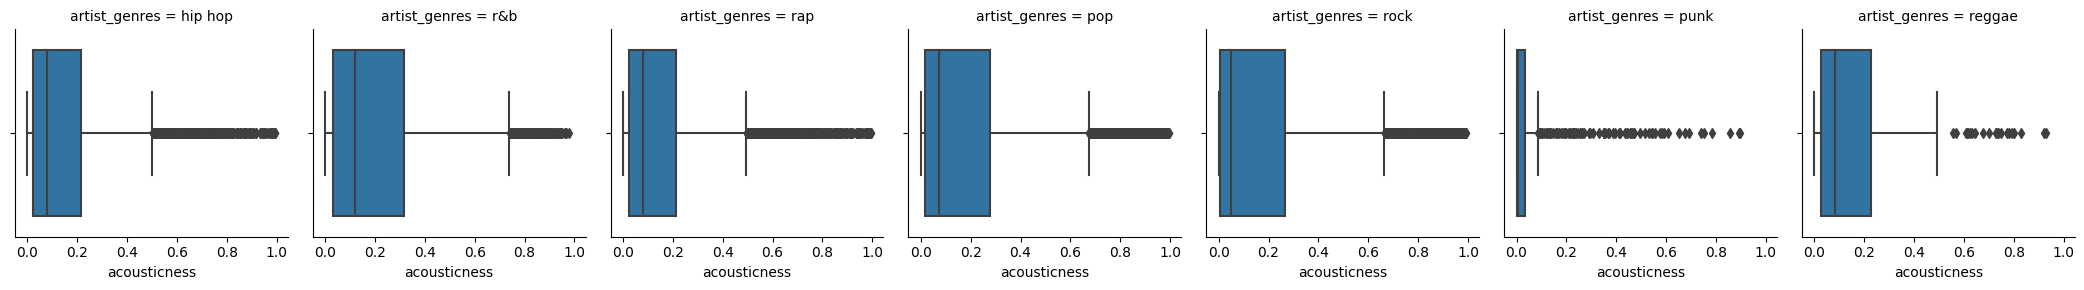

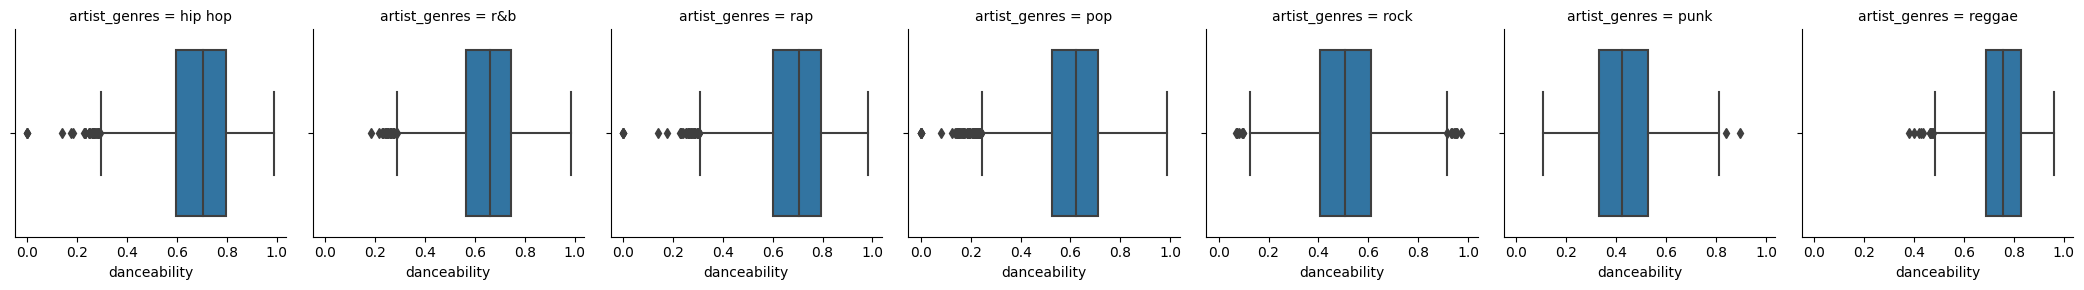

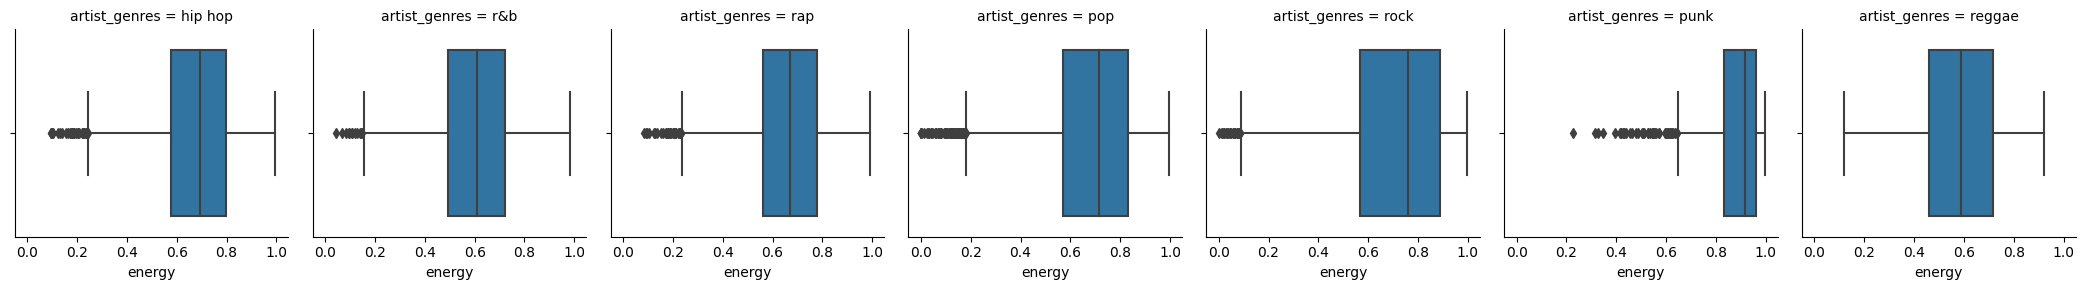

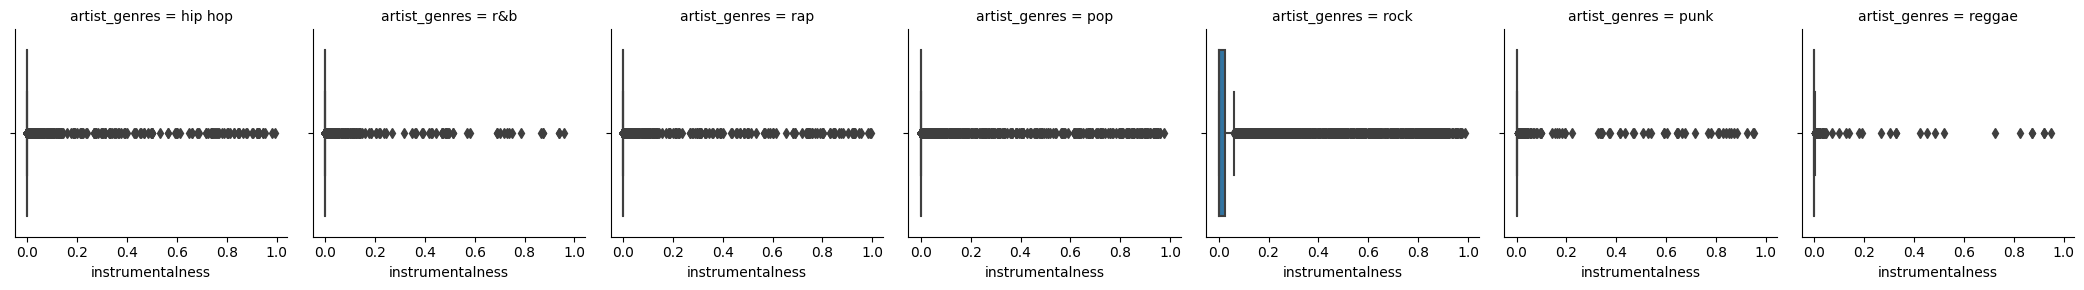

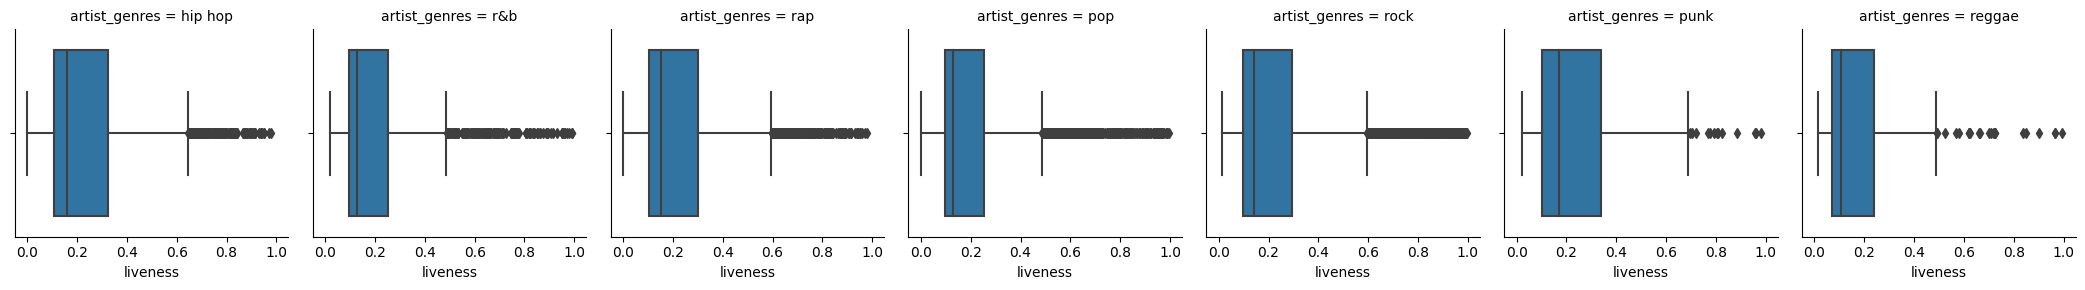

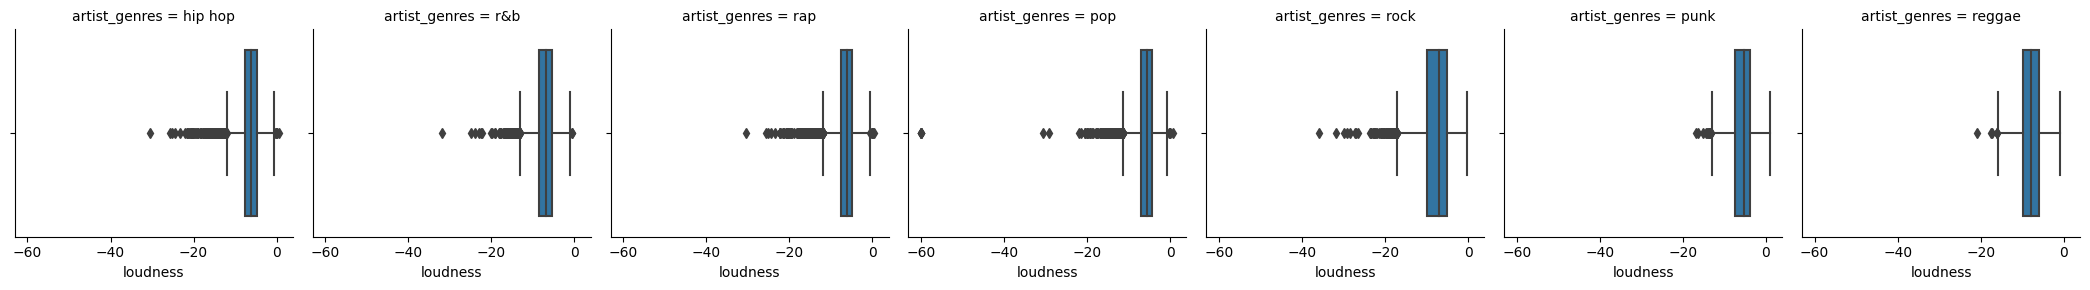

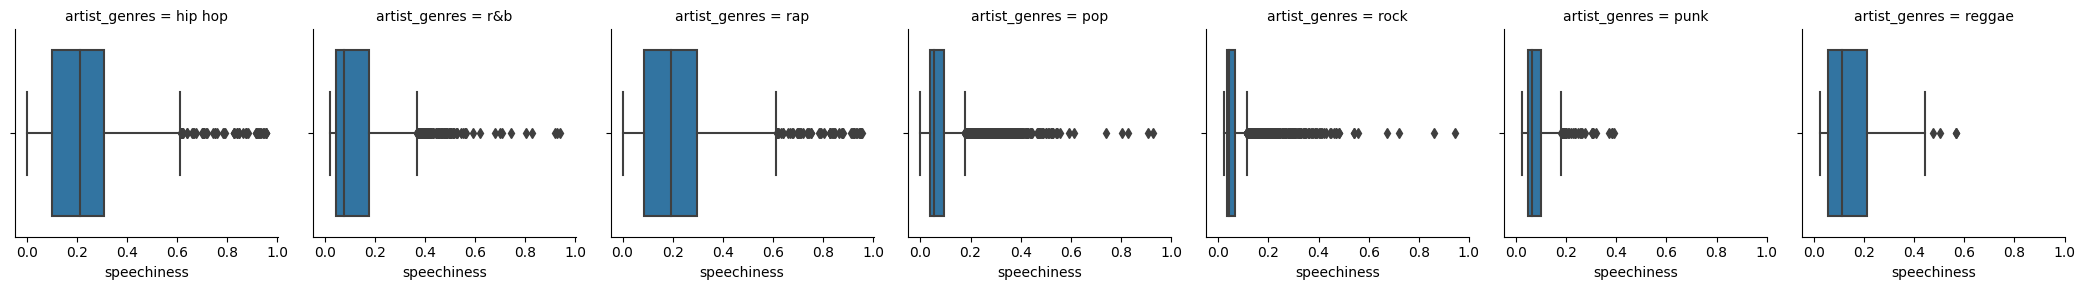

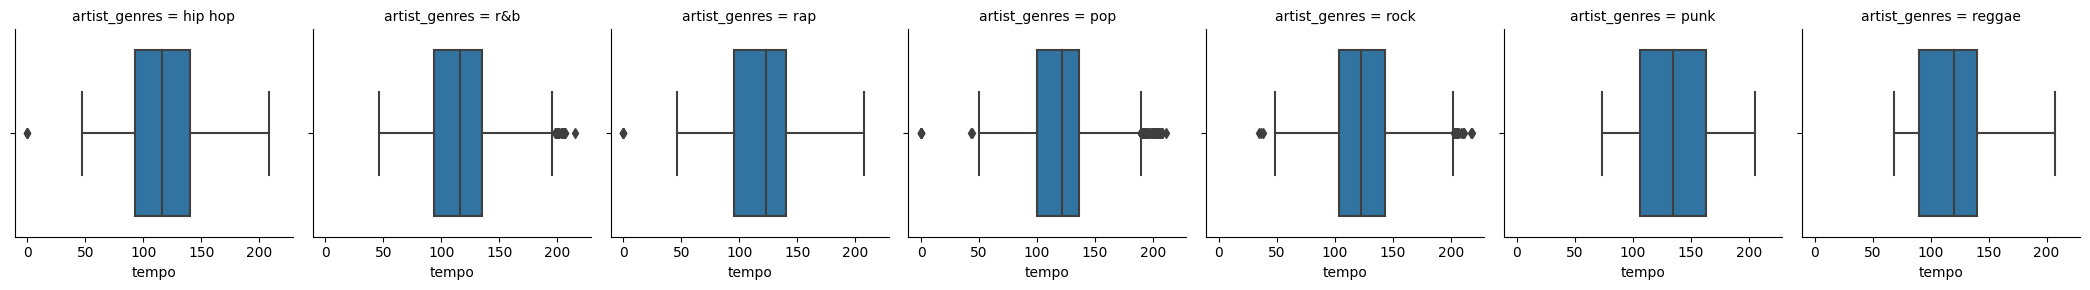

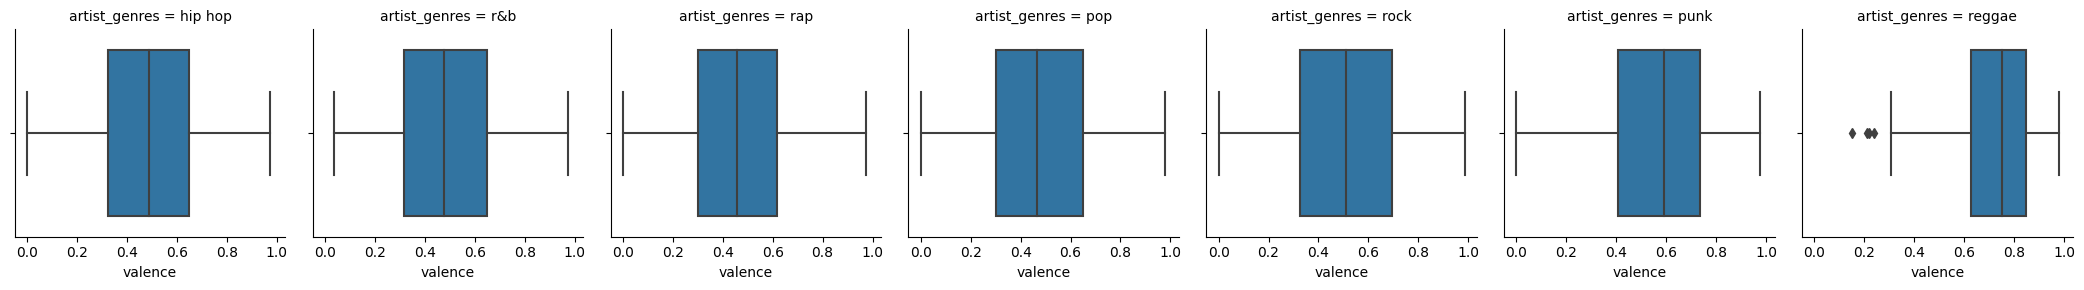

In [19]:
# Para todas as colunas númericas, plota o boxplot por gênero

for feature in features:
    plt.rcParams['figure.figsize'] = (20,7)
    g = sns.FacetGrid(df_musicas, col='artist_genres')
    g.map(sns.boxplot, feature, order=df_musicas['artist_genres'].unique())
    plt.show()

In [20]:
# Excluir os outliers de cada feature para cada gênero

df_musicas_sem_outliers = df_musicas.copy()
for feature in features:
    df_musicas_sem_outliers, num_linhas_removidas = remover_outliers_por_genero(df_musicas_sem_outliers, 'acousticness')
    print(f'Feature: {feature} - Linhas removidas: {num_linhas_removidas}')

# df_musicas_sem_outliers, num_linhas_removidas = remover_outliers_por_genero(df_musicas_sem_outliers, 'acousticness')
# print(f'Linhas removidas: {num_linhas_removidas}')



Feature: acousticness - Linhas removidas: 2086
Feature: danceability - Linhas removidas: 1343
Feature: energy - Linhas removidas: 934
Feature: instrumentalness - Linhas removidas: 790
Feature: liveness - Linhas removidas: 616
Feature: loudness - Linhas removidas: 558
Feature: speechiness - Linhas removidas: 407
Feature: tempo - Linhas removidas: 382
Feature: valence - Linhas removidas: 309


Vamos ver como ficou a distribuição de cada variável após o tratamento de outliers.

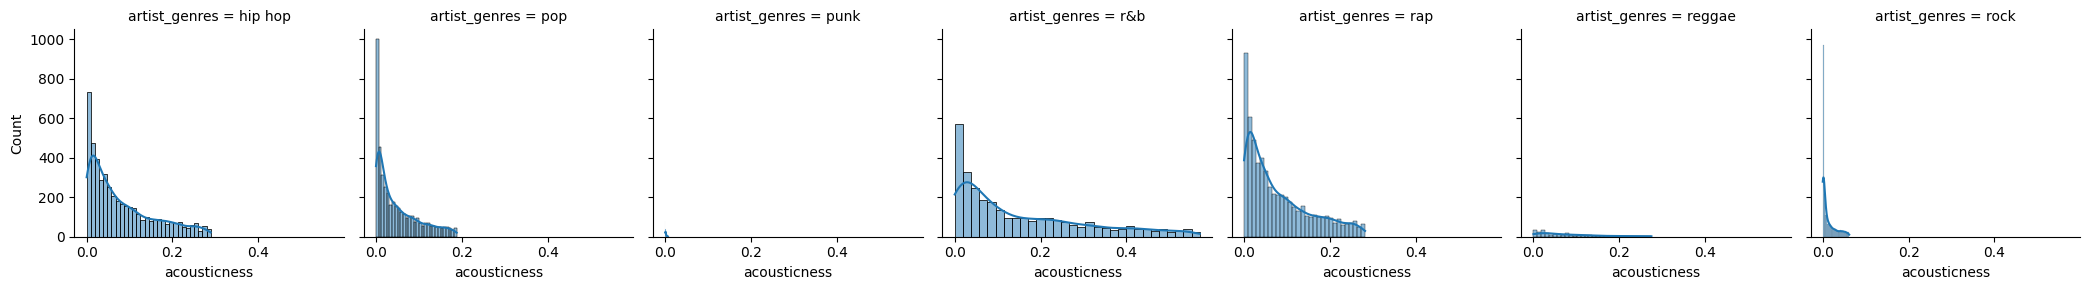

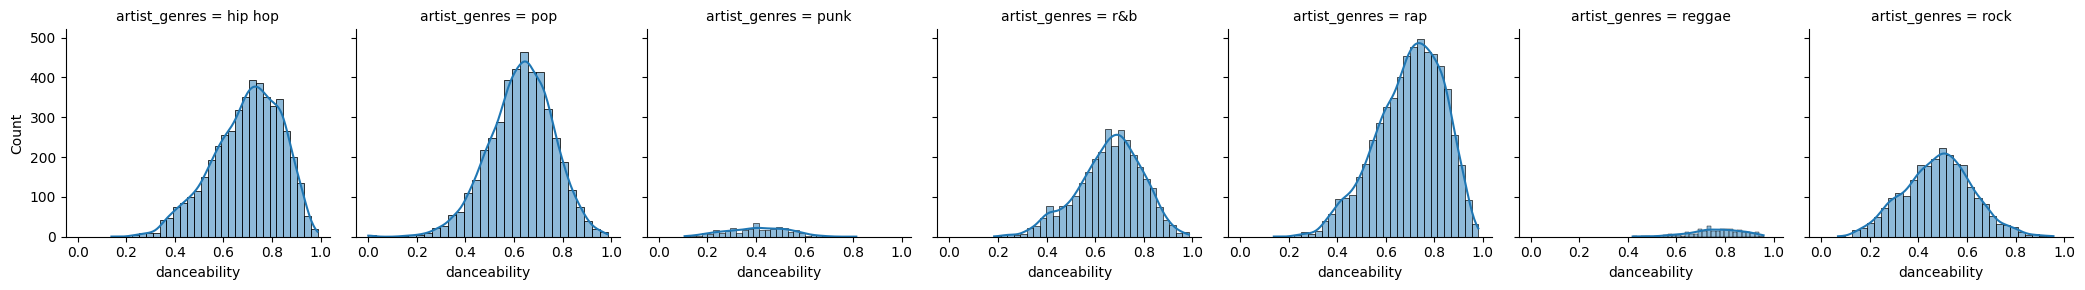

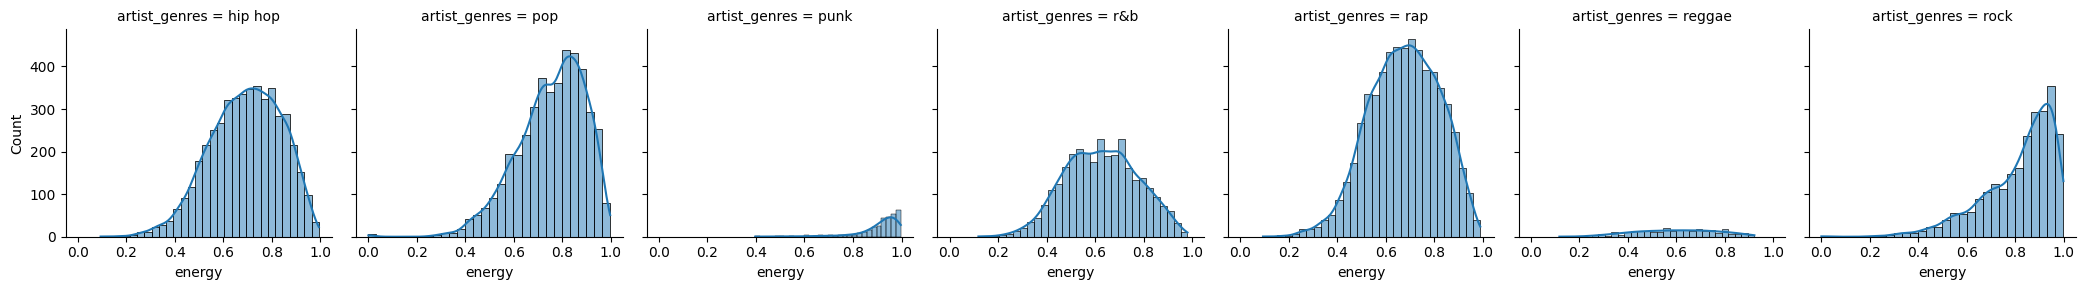

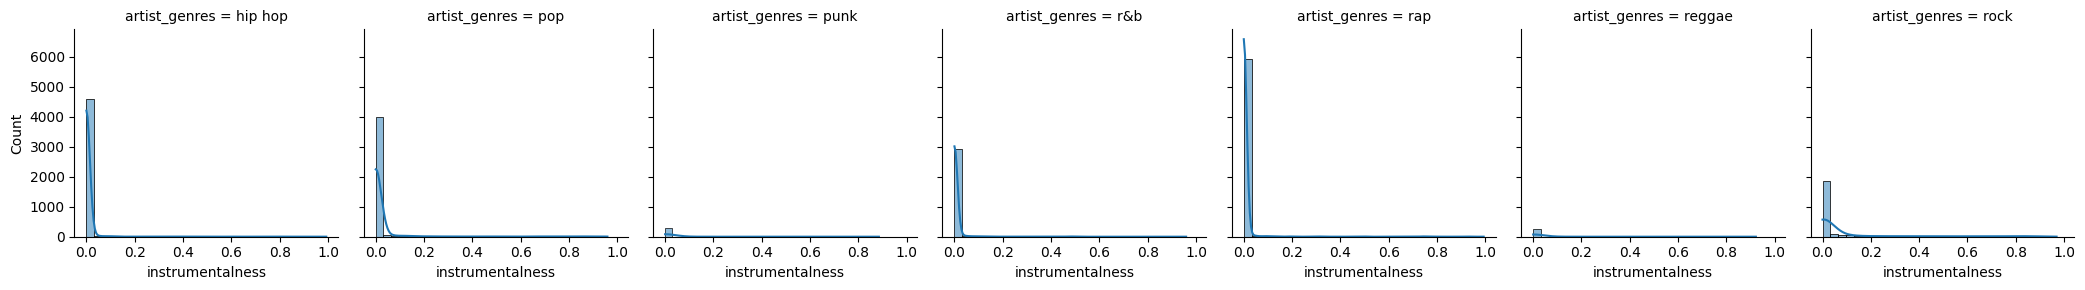

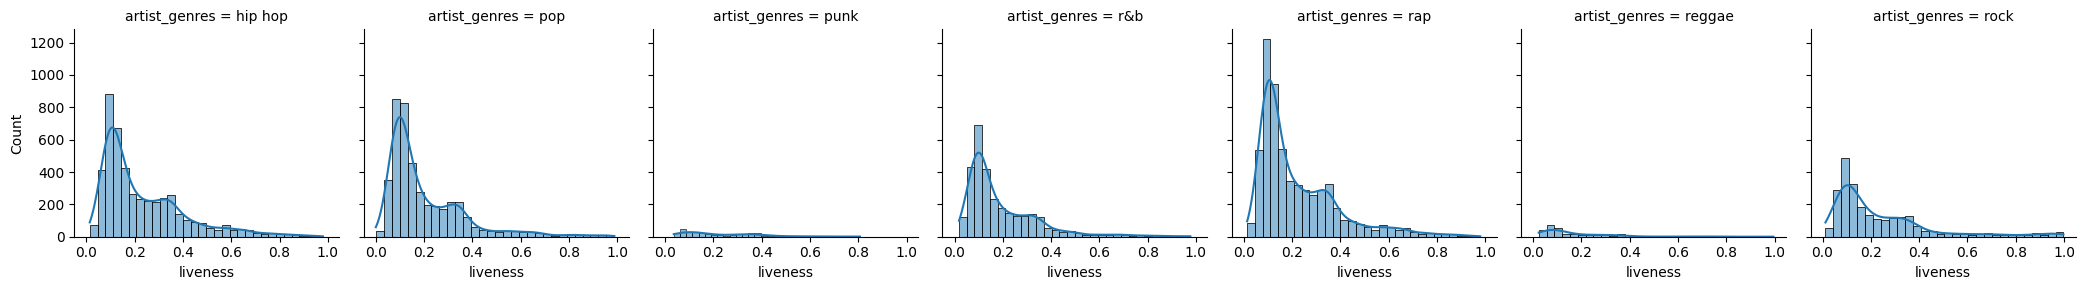

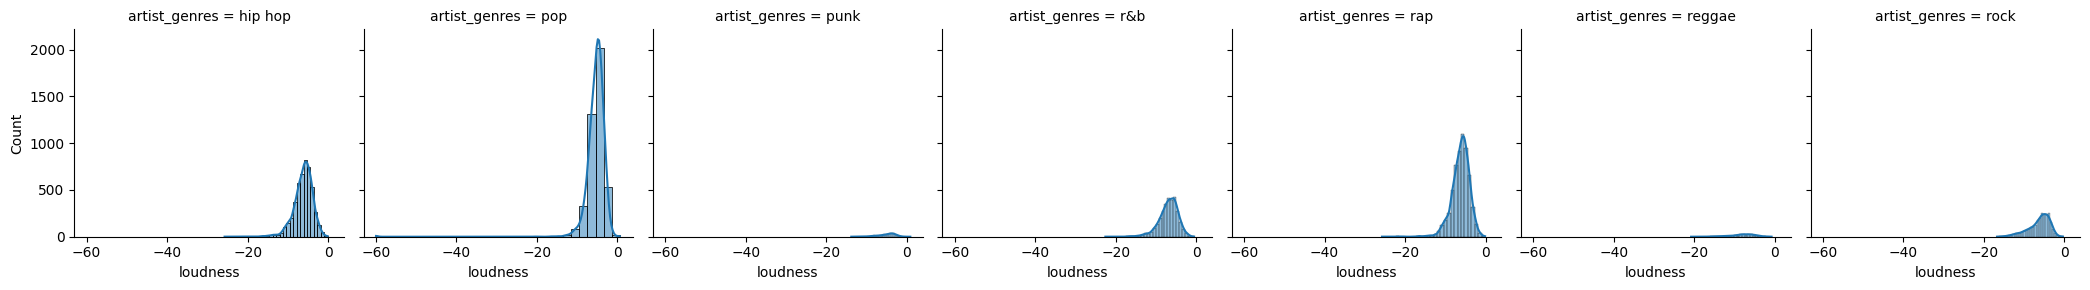

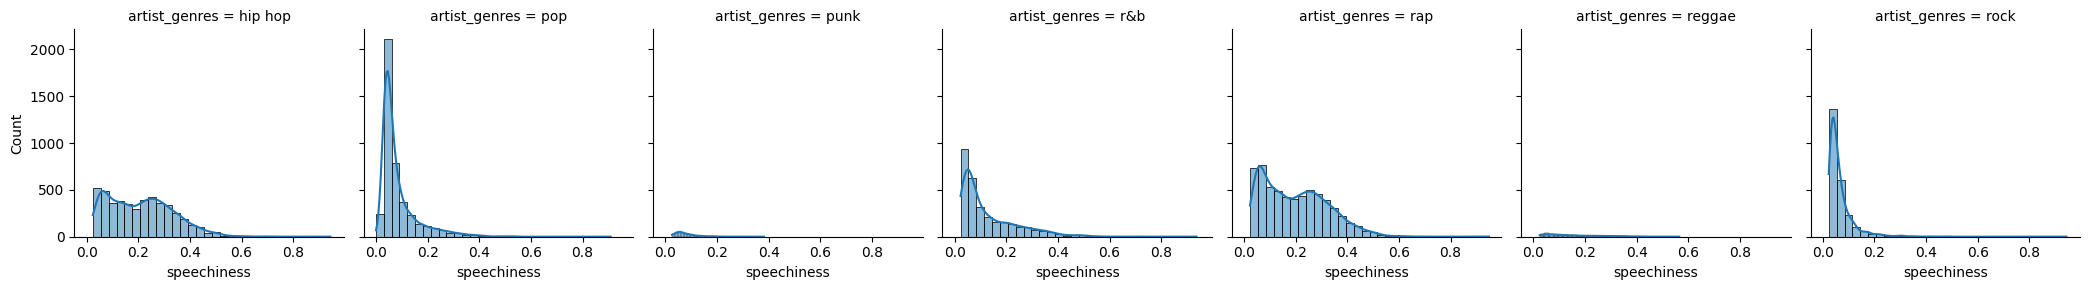

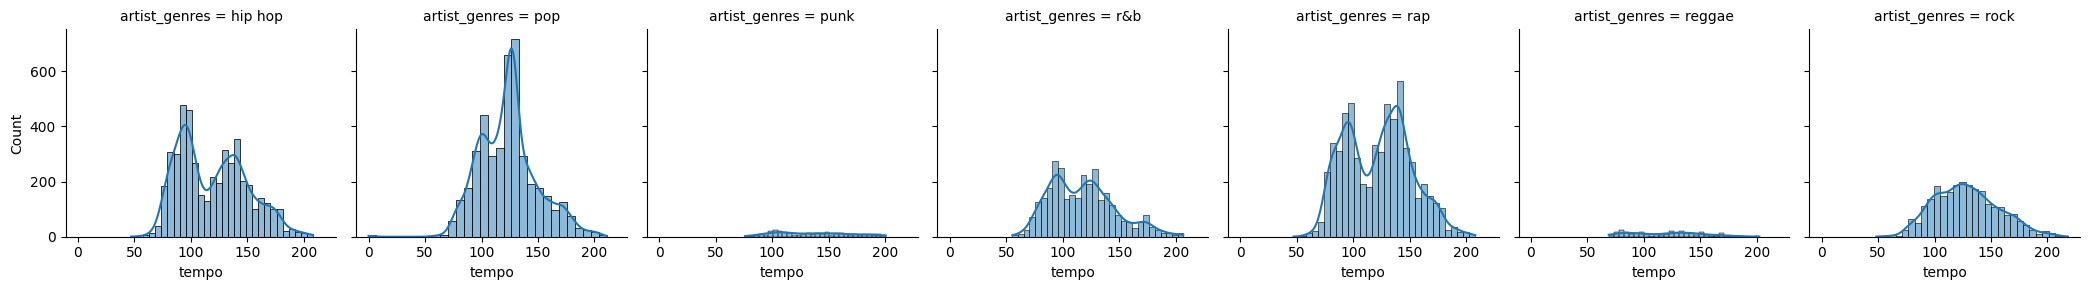

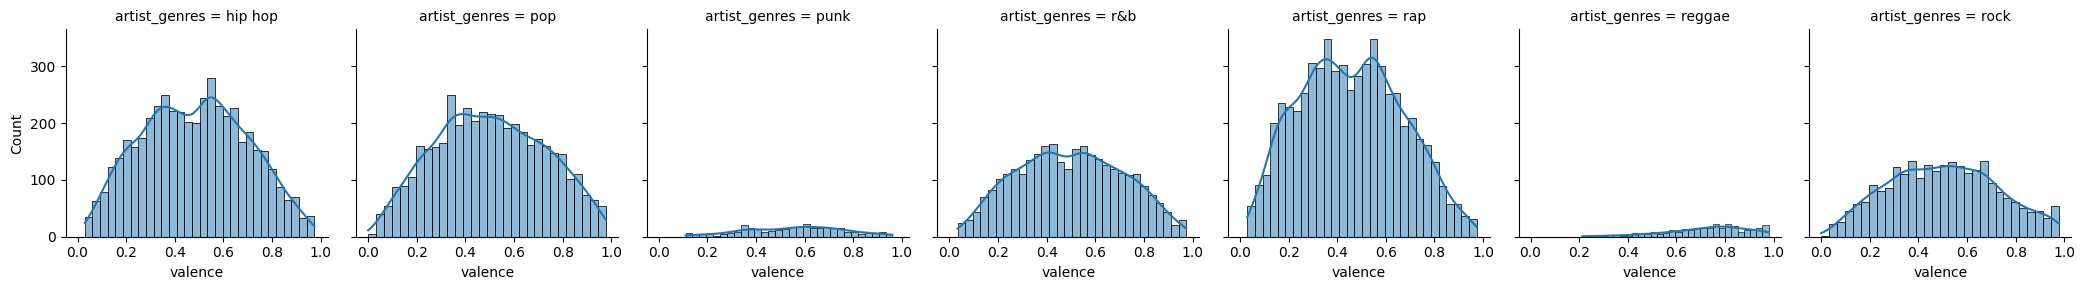

In [21]:
# Para todas as colunas númericas, plota a distribuição por gênero

for feature in features:
    plt.rcParams['figure.figsize'] = (20,7)
    g = sns.FacetGrid(df_musicas_sem_outliers, col='artist_genres')
    g.map(sns.histplot, feature, kde=True, bins=30)
    plt.show()

## 5. Análise de Dados

Quais são os Top 1 artistas mais populares de cada gênero? Quais as características das músicas deles diferem da média do seu gênero?